In [0]:
import torch
from torch import nn,optim
import torch.nn.functional as F
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.FashionMNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.FashionMNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=1000, shuffle=True)

Extracting /files/FashionMNIST/raw/train-images-idx3-ubyte.gz to /files/FashionMNIST/raw


Extracting /files/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /files/FashionMNIST/raw



Extracting /files/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /files/FashionMNIST/raw


Extracting /files/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /files/FashionMNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.



64


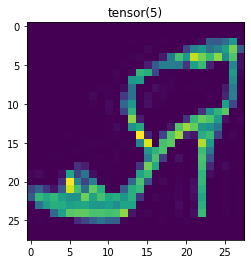

In [0]:
train_examples=enumerate(train_loader)
batch_idx,(train_examples_data,train_examples_targets)=next(train_examples)
train_examples_data1=train_examples_data.view(64,1,784)

number=56
plt.imshow(train_examples_data[number][0])
plt.title(train_examples_targets[number])
print(len(train_examples_targets))

In [0]:
class Everything(nn.Module):
  def __init__(self):
    super(Everything, self).__init__()
    self.hidden1=nn.Linear(784,128)
    self.hidden2=nn.Linear(128,64)
    self.hidden3=nn.Linear(64,32)
    self.output=nn.Linear(32,10)
  def forward(self,x):
    x=torch.tanh(self.hidden1(x))
    x=torch.tanh(self.hidden2(x))
    x=torch.tanh(self.hidden3(x))
    x=F.log_softmax(self.output(x),dim=1)
    #x=self.output(x)
    return x

In [0]:
epochs=9
model=Everything()

In [0]:
use_cuda=True

In [0]:
if use_cuda and torch.cuda.is_available():
    model.cuda()

In [82]:
optimizer=optim.SGD(model.parameters(),lr=0.04)
criterion=nn.NLLLoss()
count=0
for i in range(epochs):
  training_loss=0
  for images,labels in train_loader:
  #  count+=1
    #print(images.shape)
    if use_cuda and torch.cuda.is_available():
      images = images.cuda()
      labels = labels.cuda()
    train_examples_data1=images.view(images.shape[0],784)
    optimizer.zero_grad()

    logProbs=model(train_examples_data1)

    loss=criterion(logProbs,labels)

    training_loss+=loss

    loss.backward()
    
    optimizer.step()
  print(training_loss)
#print(count)

tensor(243.3884, device='cuda:0', grad_fn=<AddBackward0>)
tensor(235.1033, device='cuda:0', grad_fn=<AddBackward0>)
tensor(228.1452, device='cuda:0', grad_fn=<AddBackward0>)
tensor(220.6648, device='cuda:0', grad_fn=<AddBackward0>)
tensor(213.5184, device='cuda:0', grad_fn=<AddBackward0>)
tensor(204.9205, device='cuda:0', grad_fn=<AddBackward0>)
tensor(199.9427, device='cuda:0', grad_fn=<AddBackward0>)
tensor(195.7166, device='cuda:0', grad_fn=<AddBackward0>)
tensor(189.1228, device='cuda:0', grad_fn=<AddBackward0>)


In [0]:
test_examples=enumerate(test_loader)
batch_idx,(test_examples_data,test_examples_targets)=next(test_examples)

In [0]:
if use_cuda and torch.cuda.is_available():
      test_examples_data = test_examples_data.cuda()
      test_examples_targets = test_examples_targets.cuda()
test_examples_data1=test_examples_data.view(1000,1,784)

In [0]:
def PrintProbOutput(data):
  data=data.cpu().detach().numpy()
  x=torch.Tensor(range(0,10))
  print (data)
  print (x)
  #plt.bar(x.view(1,10),Probs)
  #sns.distplot(a=Probs,hist=True)
  plt.scatter(x.view(1,10),data)
  plt.ylim(0,1)
  plt.show

Text(0.5, 1.0, "tensor(2, device='cuda:0')")

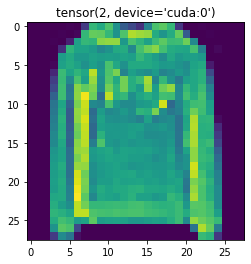

In [86]:
number=290
plt.imshow(test_examples_data[number][0].cpu())
plt.title(test_examples_targets[number])

[[2.49799434e-03 1.05444204e-04 5.72981477e-01 6.79799821e-04
  3.23733911e-02 1.11490235e-05 3.91289622e-01 1.83987424e-06
  5.83247456e-05 9.55631776e-07]]
tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])


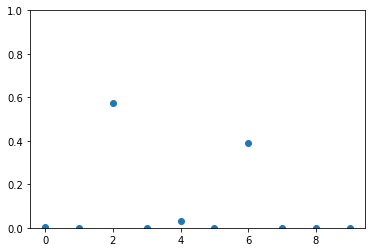

In [87]:
with torch.no_grad():
  output=model(test_examples_data1[number])
  output=F.softmax(output,dim=1)
PrintProbOutput(output)

In [0]:
def CalculatedOutput(output):
  highest=-1
  rank=-1
  for i in range(len(output[0])):
    if output[0][i]>highest:
      highest=output[0][i]
      rank=i
  return np.array([rank])
def Accuracy():
  calc_output=np.array([])
  for i in test_examples_data1:
    with torch.no_grad():
      output1=model(i)
      output1=F.softmax(output1,dim=1)
    #print(CalculatedOutput(output1))
    calc_output=np.append(calc_output,CalculatedOutput(output1))
  exp_output=test_examples_targets.cpu().numpy() #Converts into an numpy array
   # correct=0
  # for i in range(len(calc_output)):
  #   if calc_output[i]==exp_output[i]:
  #     correct+=1
  accuracy=100*(np.sum(calc_output==exp_output)/1000)
  return accuracy

In [91]:
Accuracy()

88.3